In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') # ignore warnings
from sklearn.preprocessing import OrdinalEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
# Read csv file
df = pd.read_csv('medical_clean.csv')

In [5]:
# Get summary of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

In [7]:
# Check for duplicates
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [9]:
# Check for missing values
df.isnull().sum()

CaseOrder             0
Customer_id           0
Interaction           0
UID                   0
City                  0
State                 0
County                0
Zip                   0
Lat                   0
Lng                   0
Population            0
Area                  0
TimeZone              0
Job                   0
Children              0
Age                   0
Income                0
Marital               0
Gender                0
ReAdmis               0
VitD_levels           0
Doc_visits            0
Full_meals_eaten      0
vitD_supp             0
Soft_drink            0
Initial_admin         0
HighBlood             0
Stroke                0
Complication_risk     0
Overweight            0
Arthritis             0
Diabetes              0
Hyperlipidemia        0
BackPain              0
Anxiety               0
Allergic_rhinitis     0
Reflux_esophagitis    0
Asthma                0
Services              0
Initial_days          0
TotalCharge           0
Additional_charg

In [11]:
# Create variable and dataframe for regression model
regression_col = ["Initial_admin", "HighBlood", "Stroke", "Complication_risk", "Overweight", "Arthritis", "Diabetes", "BackPain", "Asthma", 
                  "Hyperlipidemia", "Initial_days", "Gender", "Age", "Doc_visits", "Anxiety", "ReAdmis"
]

regression_df = df[regression_col]

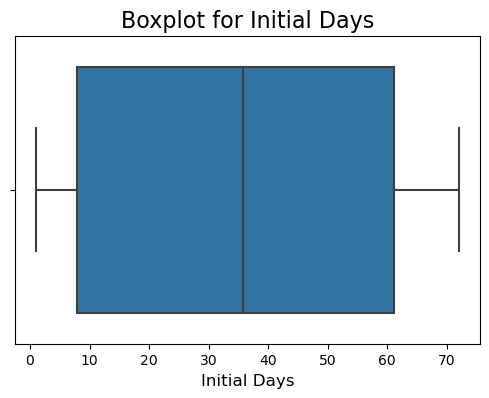

In [13]:
# Create a boxplot for 'Initial_days'
plt.figure(figsize=(6, 4))  # Adjust figure size 
sns.boxplot(x=df["Initial_days"])

# Add title and labels
plt.title("Boxplot for Initial Days", fontsize=16)
plt.xlabel("Initial Days", fontsize=12)

# Show the plot
plt.show()

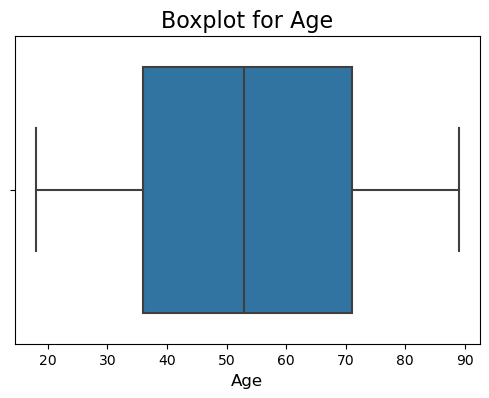

In [15]:
# Create a boxplot for 'Age'
plt.figure(figsize=(6, 4))  # Adjust figure size 
sns.boxplot(x=df["Age"])

# Add title and labels
plt.title("Boxplot for Age", fontsize=16)
plt.xlabel("Age", fontsize=12)

# Show the plot
plt.show()

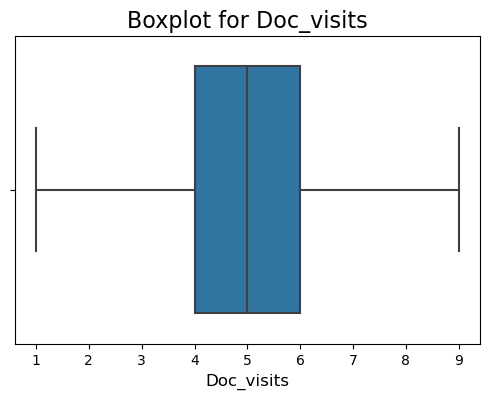

In [17]:
# Create a boxplot for 'Doc_visits'
plt.figure(figsize=(6, 4))  # Adjust figure size 
sns.boxplot(x=df["Doc_visits"])

# Add title and labels
plt.title("Boxplot for Doc_visits", fontsize=16)
plt.xlabel("Doc_visits", fontsize=12)

# Show the plot
plt.show()

In [19]:
# Get sumary statistics for continuous variables
regression_df.describe()

,Initial_days,Age,Doc_visits
count,10000.000000,10000.000000,10000.000000
mean,34.455299,53.511700,5.012200
std,26.309341,20.638538,1.045734
min,1.001981,18.000000,1.000000
25%,7.896215,36.000000,4.000000
50%,35.836244,53.000000,5.000000
75%,61.161020,71.000000,6.000000
max,71.981490,89.000000,9.000000


In [21]:
# Get count of unique values in "Initial_admin"
df["Initial_admin"].value_counts()

Initial_admin
Emergency Admission      5060
Elective Admission       2504
Observation Admission    2436
Name: count, dtype: int64

In [23]:
# Get count of unique values in "HighBlood"
df["HighBlood"].value_counts()

HighBlood
No     5910
Yes    4090
Name: count, dtype: int64

In [25]:
# Get count of unique values in "Stroke"
df["Stroke"].value_counts()

Stroke
No     8007
Yes    1993
Name: count, dtype: int64

In [27]:
# Get count of unique values in "Complication_risk"
df["Complication_risk"].value_counts()

Complication_risk
Medium    4517
High      3358
Low       2125
Name: count, dtype: int64

In [29]:
# Get count of unique values in "Overweight"
df["Overweight"].value_counts()

Overweight
Yes    7094
No     2906
Name: count, dtype: int64

In [31]:
# Get count of unique values in "Arthritis"
df["Arthritis"].value_counts()

Arthritis
No     6426
Yes    3574
Name: count, dtype: int64

In [33]:
# Get count of unique values in "Diabetes"
df["Diabetes"].value_counts()

Diabetes
No     7262
Yes    2738
Name: count, dtype: int64

In [35]:
# Get count of unique values in "BackPain"
df["BackPain"].value_counts()

BackPain
No     5886
Yes    4114
Name: count, dtype: int64

In [37]:
# Get count of unique values in "Asthma"
df["Asthma"].value_counts()

Asthma
No     7107
Yes    2893
Name: count, dtype: int64

In [39]:
# Get count of unique values in "Hyperlipidemia"
df["Hyperlipidemia"].value_counts()

Hyperlipidemia
No     6628
Yes    3372
Name: count, dtype: int64

In [41]:
# Get count of unique values in "Gender"
df["Gender"].value_counts()

Gender
Female       5018
Male         4768
Nonbinary     214
Name: count, dtype: int64

In [43]:
# Get count of unique values in "Anxiety"
df["Anxiety"].value_counts()

Anxiety
No     6785
Yes    3215
Name: count, dtype: int64

In [45]:
# Get count of unique values in "ReAdmis"
df["ReAdmis"].value_counts()

ReAdmis
No     6331
Yes    3669
Name: count, dtype: int64

In [47]:
# Re-express categorical variables w/ Yes/No values
yes_no = {"Yes": 1, "No": 0}
df["HighBlood"] = df["HighBlood"].replace(yes_no).infer_objects(copy=False)
df["Stroke"] = df["Stroke"].replace(yes_no).infer_objects(copy=False)
df["Overweight"] = df["Overweight"].replace(yes_no).infer_objects(copy=False)
df["Arthritis"] = df["Arthritis"].replace(yes_no).infer_objects(copy=False)
df["Diabetes"] = df["Diabetes"].replace(yes_no).infer_objects(copy=False)
df["BackPain"] = df["BackPain"].replace(yes_no).infer_objects(copy=False)
df["Asthma"] = df["Asthma"].replace(yes_no).infer_objects(copy=False)
df["Hyperlipidemia"] = df["Hyperlipidemia"].replace(yes_no).infer_objects(copy=False)
df["Gender"] = df["Gender"].replace(yes_no).infer_objects(copy=False)
df["Anxiety"] = df["Anxiety"].replace(yes_no).infer_objects(copy=False)
df["ReAdmis"] = df["ReAdmis"].replace(yes_no).infer_objects(copy=False)

In [49]:
# Create dummy variables for "Gender" and "Initial_admin"
df = df.join(pd.get_dummies(df["Gender"], prefix="Gender", drop_first=True))
df = df.join(pd.get_dummies(df["Initial_admin"], prefix="Initial_admin", drop_first=True))

# Replace spaces with '_'
df.columns = df.columns.str.replace(' ', '_')

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 54 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   CaseOrder                            10000 non-null  int64  
 1   Customer_id                          10000 non-null  object 
 2   Interaction                          10000 non-null  object 
 3   UID                                  10000 non-null  object 
 4   City                                 10000 non-null  object 
 5   State                                10000 non-null  object 
 6   County                               10000 non-null  object 
 7   Zip                                  10000 non-null  int64  
 8   Lat                                  10000 non-null  float64
 9   Lng                                  10000 non-null  float64
 10  Population                           10000 non-null  int64  
 11  Area                         

In [53]:
# Convert dummy variables into binary value (0/1)
true_false = {True: 1, False: 0}
df["Gender_Male"] = df["Gender_Male"].replace(true_false).infer_objects(copy=False)
df["Gender_Nonbinary"] = df["Gender_Nonbinary"].replace(true_false).infer_objects(copy=False)
df["Initial_admin_Emergency_Admission"] = df["Initial_admin_Emergency_Admission"].replace(true_false).infer_objects(copy=False)
df["Initial_admin_Observation_Admission"] = df["Initial_admin_Observation_Admission"].replace(true_false).infer_objects(copy=False)

In [55]:
# Perform ordinal encoding for "Complication_risk"
# Code adapted from GeeksforGeeks:
# GeeksforGeeks. (n.d.). How to perform ordinal encoding using sklearn. Retrieved December 10, 2024, from https://www.geeksforgeeks.org/how-to-perform-ordinal-encoding-using-sklearn/

# Initialize and fit encoder
encoder = OrdinalEncoder(categories=[['Low', 'Medium', 'High']])
df['Complication_risk'] = encoder.fit_transform(df[['Complication_risk']])

# Convert values to integer
df['Complication_risk'] = df['Complication_risk'].astype(int)

# Print result
print(df[['Complication_risk']])

      Complication_risk
0                     1
1                     2
2                     1
3                     1
4                     0
...                 ...
9995                  1
9996                  1
9997                  2
9998                  1
9999                  0

[10000 rows x 1 columns]


In [57]:
# Check dataframe summary pre-model
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 54 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   CaseOrder                            10000 non-null  int64  
 1   Customer_id                          10000 non-null  object 
 2   Interaction                          10000 non-null  object 
 3   UID                                  10000 non-null  object 
 4   City                                 10000 non-null  object 
 5   State                                10000 non-null  object 
 6   County                               10000 non-null  object 
 7   Zip                                  10000 non-null  int64  
 8   Lat                                  10000 non-null  float64
 9   Lng                                  10000 non-null  float64
 10  Population                           10000 non-null  int64  
 11  Area                         

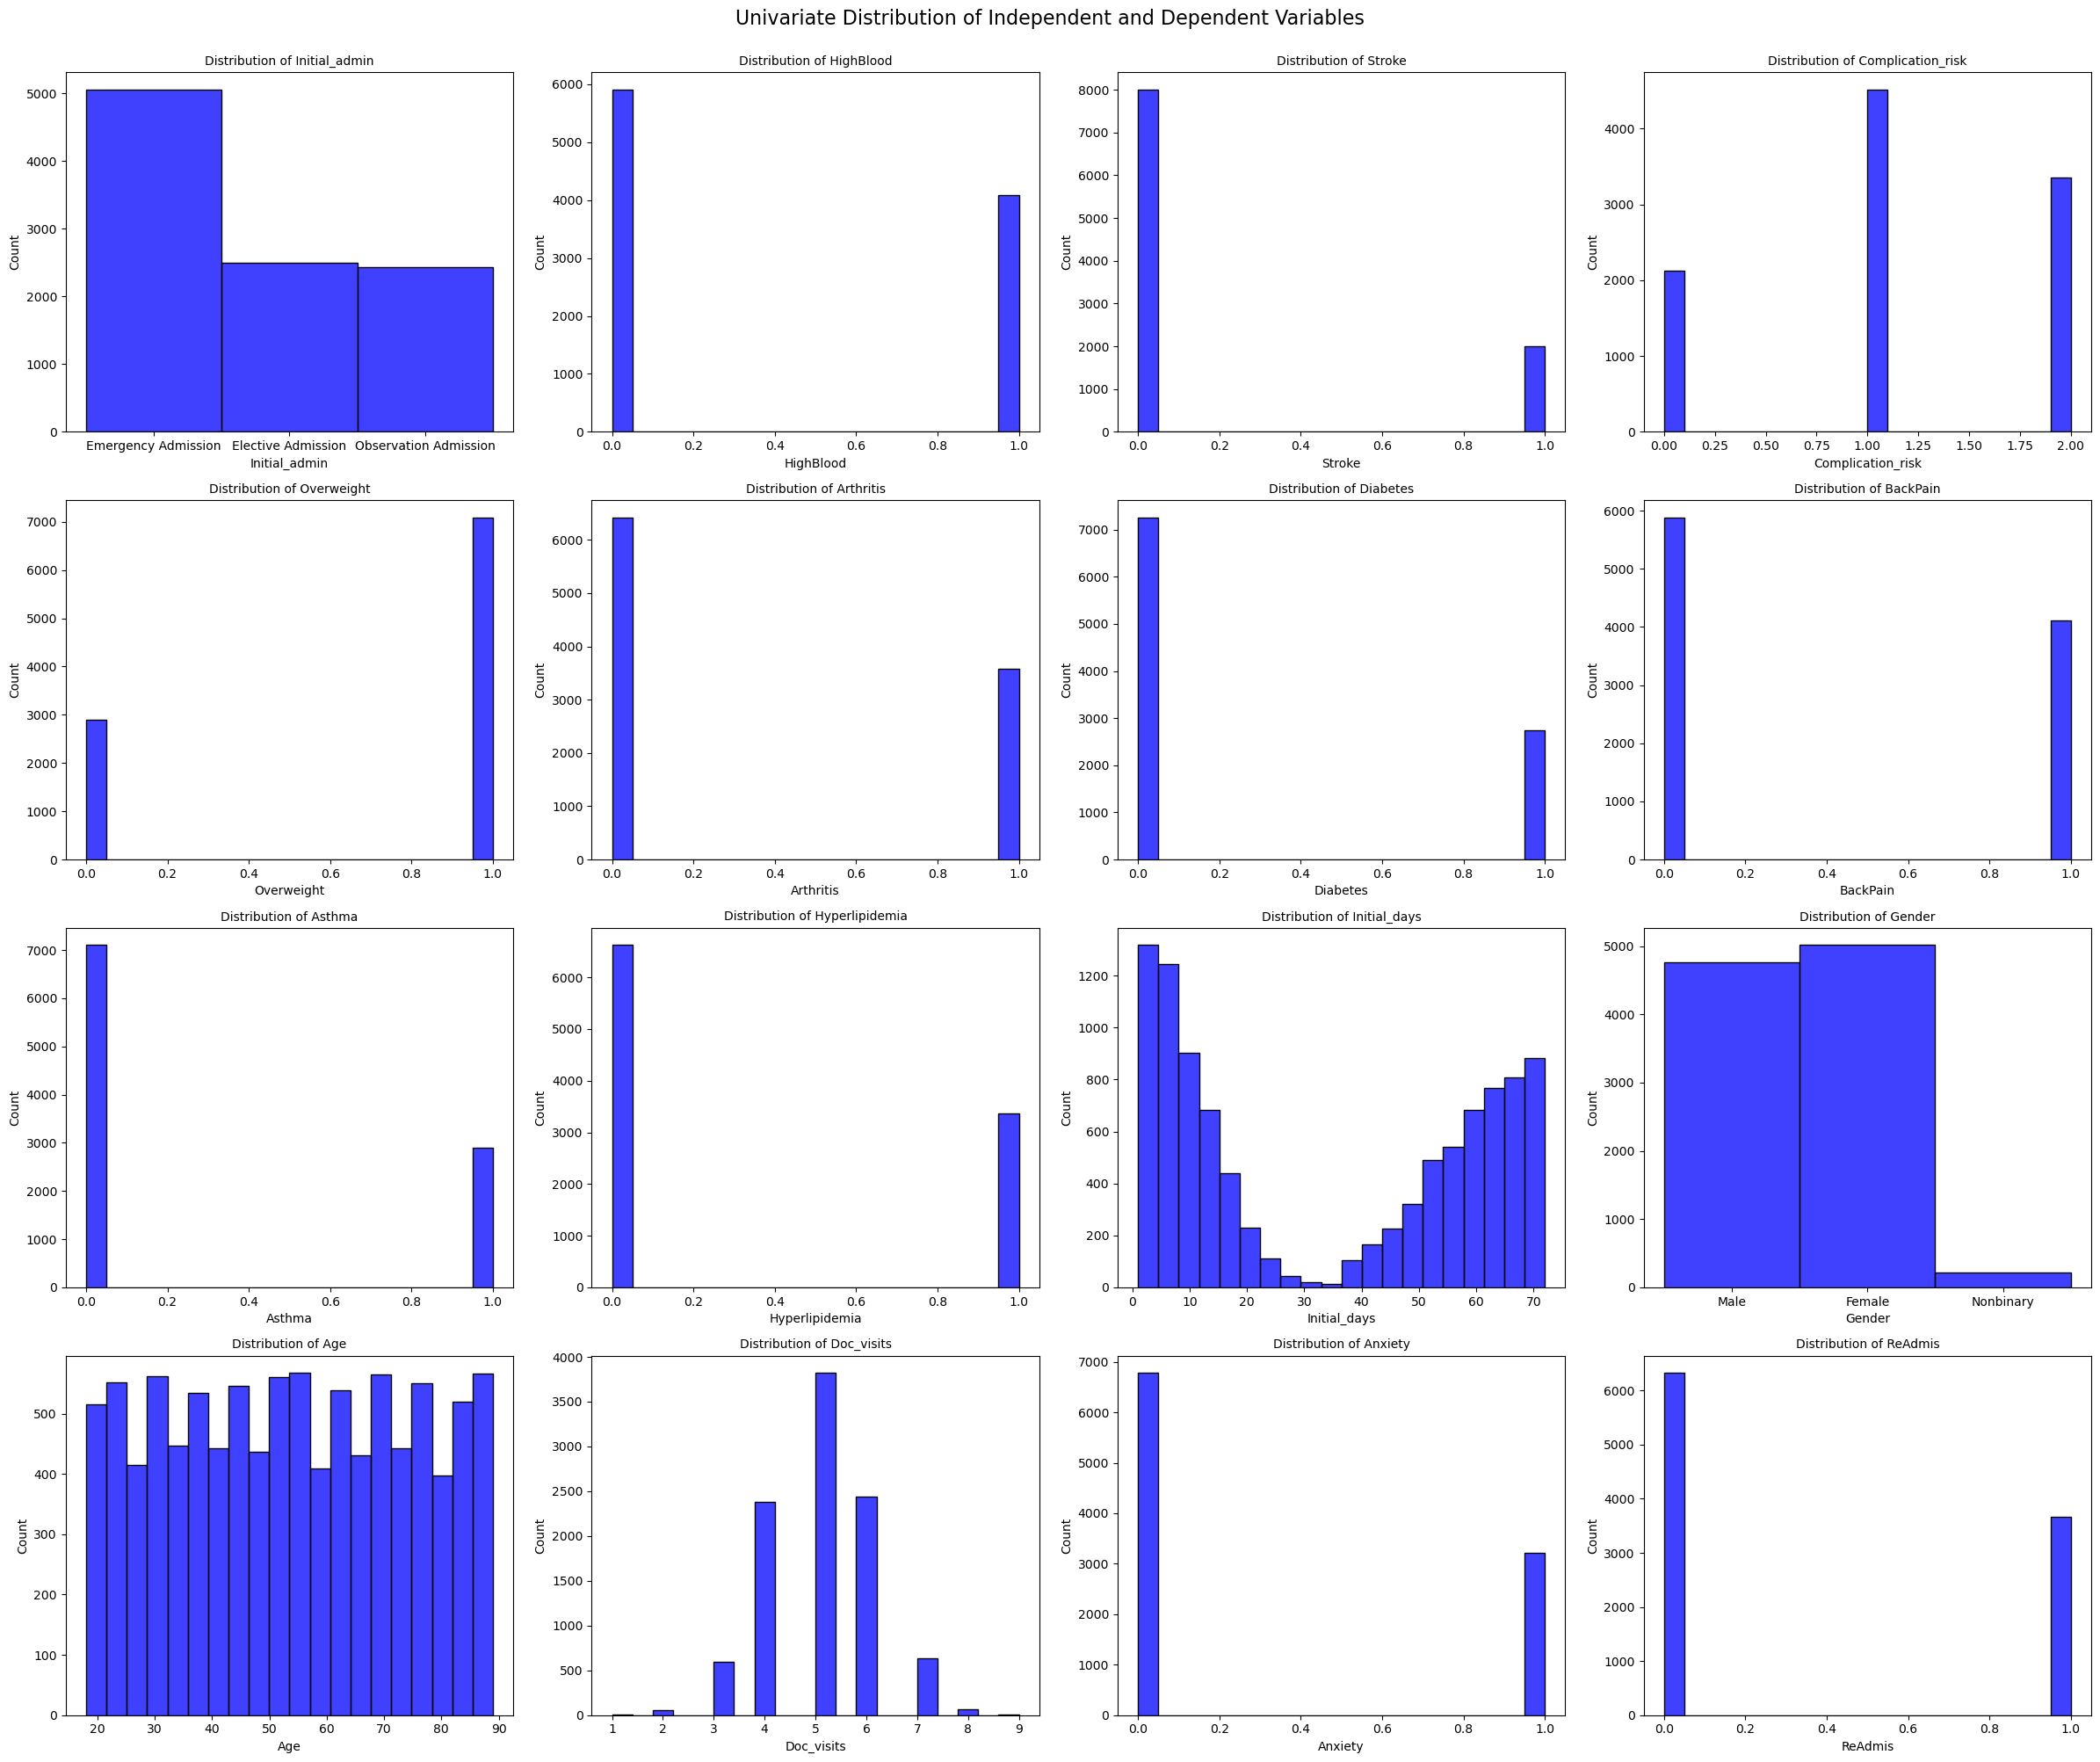

In [59]:
# Create histograms

# Creating a grid layout for the histograms
num_cols = 4  # Number of plots per row
num_rows = math.ceil(len(regression_col) / num_cols)  # Calculate required rows
fig, axes = plt.subplots(num_rows, num_cols, figsize=(24, 20))
fig.subplots_adjust(hspace=0.4, wspace=0.4)  # Add spacing between plots

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each predictor variable and plot the histogram
for i, col in enumerate(regression_col):
    sns.histplot(df[col], bins=20, kde=False, ax=axes[i], color='blue')  # Histogram
    axes[i].set_title(f"Distribution of {col}", fontsize=10)  # Title
    axes[i].set_xlabel(col)  # X-axis label
    axes[i].set_ylabel("Count")  # Y-axis label

# Remove unused subplots
for j in range(len(regression_col), len(axes)):
    fig.delaxes(axes[j])  # Remove extra axes

plt.suptitle("Univariate Distribution of Independent and Dependent Variables", fontsize=16, y=1)
plt.tight_layout()

# Show the plot
plt.show()

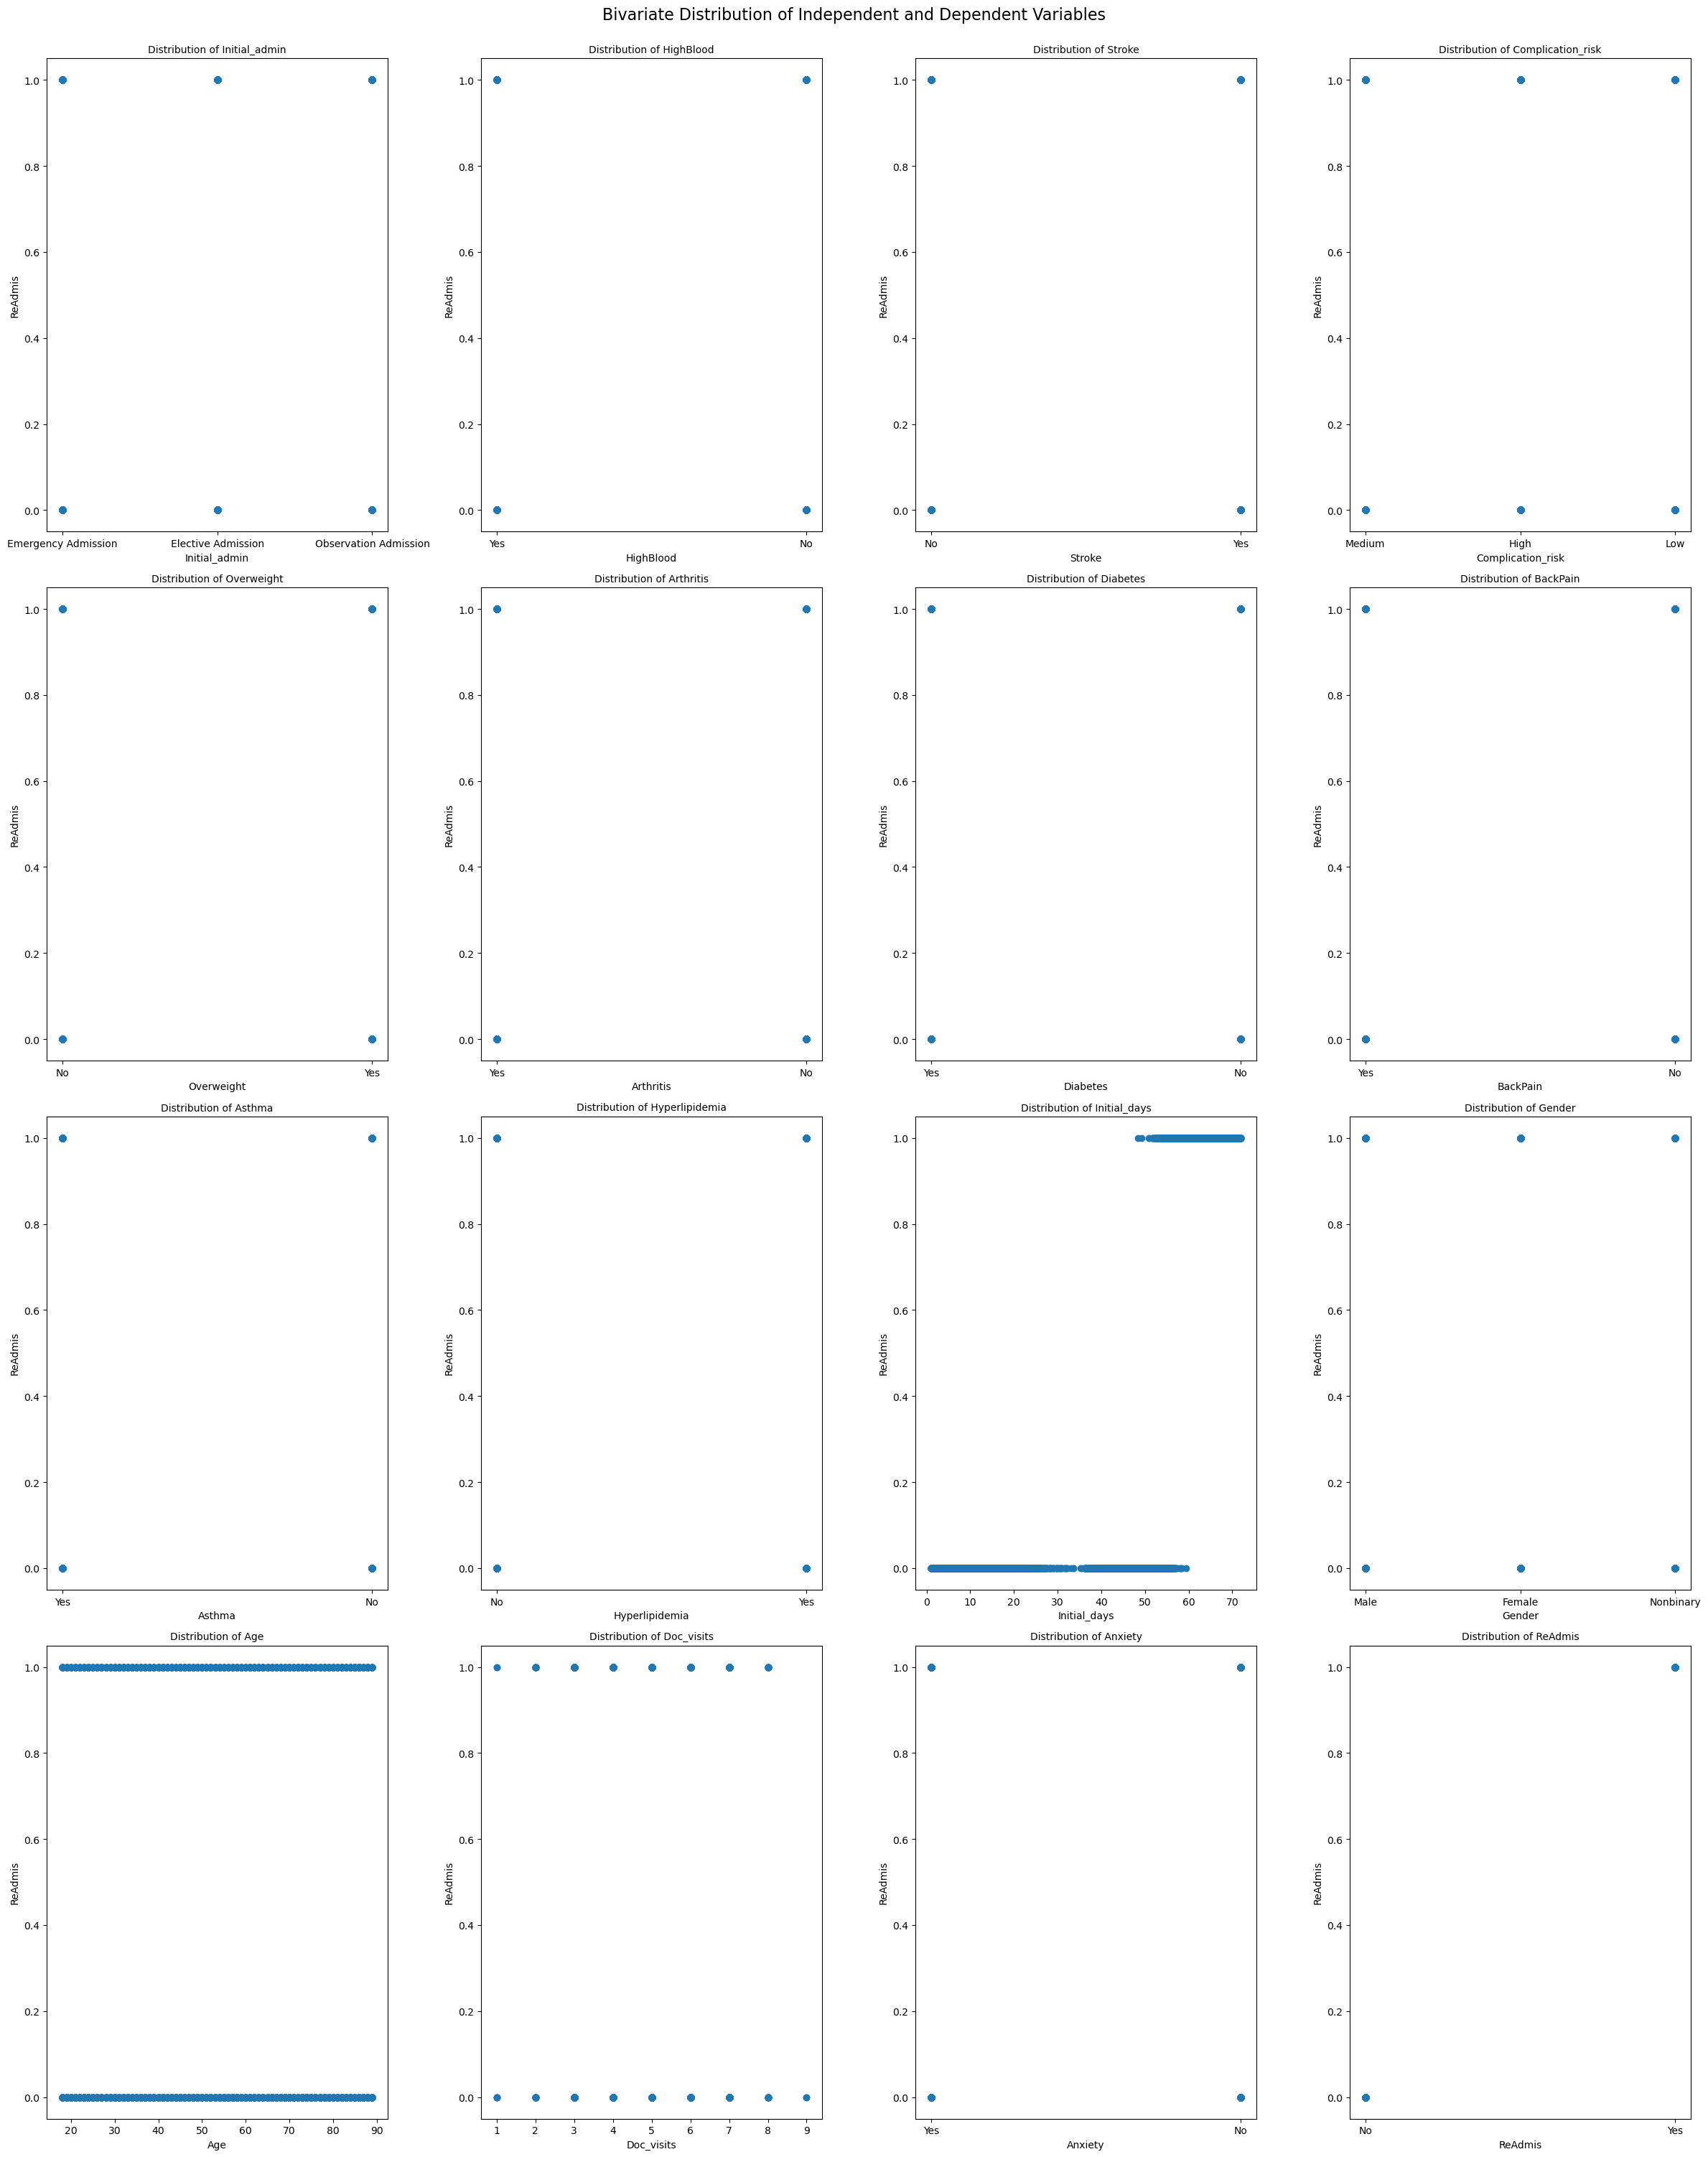

In [61]:
# Create scatterplots

# Creating a grid layout for the histograms
num_cols = 4  # Number of plots per row
num_rows = math.ceil(len(regression_df.columns) / num_cols)  # Calculate required rows
fig, axes = plt.subplots(num_rows, num_cols, figsize=(24, 30))
fig.subplots_adjust(hspace=0.4, wspace=0.4)  # Add spacing between plots

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each predictor variable and plot the histogram
for i, col in enumerate(regression_df.columns):
  # Scatter plot with blue color
  axes[i].scatter(regression_df[col], df["ReAdmis"])  # Assuming 'regression_col' holds pairs of column names
  axes[i].set_title(f"Distribution of {col}", fontsize=10)  # Title
  axes[i].set_xlabel(col)  # X-axis label
  axes[i].set_ylabel("ReAdmis")  # Y-axis label

# Remove unused subplots
for j in range(len(regression_df.columns), len(axes)):
    fig.delaxes(axes[j])  # Remove extra axes

plt.suptitle("Bivariate Distribution of Independent and Dependent Variables", fontsize=16, y=1)
plt.tight_layout()

# Show the plot
plt.show()

In [63]:
# Drop irrelevant columns

df = df.drop(columns=['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State', 'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area',
                      'TimeZone', 'Job','Children', 'Income', 'Marital', 'VitD_levels', 'Full_meals_eaten', 'vitD_supp', 'Soft_drink', 
                      'Additional_charges', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Services', 'TotalCharge', 'Item1', 'Item2',
                      'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8'])

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Age                                  10000 non-null  int64  
 1   Gender                               10000 non-null  object 
 2   ReAdmis                              10000 non-null  int64  
 3   Doc_visits                           10000 non-null  int64  
 4   Initial_admin                        10000 non-null  object 
 5   HighBlood                            10000 non-null  int64  
 6   Stroke                               10000 non-null  int64  
 7   Complication_risk                    10000 non-null  int64  
 8   Overweight                           10000 non-null  int64  
 9   Arthritis                            10000 non-null  int64  
 10  Diabetes                             10000 non-null  int64  
 11  Hyperlipidemia               

In [67]:
# Save cleaned csv file
df.to_csv('medical_logistic.csv')

In [69]:
# Create initial logistic regression model

X = df[["Initial_admin_Emergency_Admission", "Initial_admin_Observation_Admission","Gender_Male", "Gender_Nonbinary", "HighBlood", "Stroke", 
        "Complication_risk", "Overweight", "Arthritis", "Diabetes", "BackPain", "Asthma", "Hyperlipidemia", "Initial_days", "Age", 
        "Doc_visits", "Anxiety"]]
y = df["ReAdmis"]

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Calculate VIFs for each independent variable
vif_data = pd.DataFrame({
    'Variable': X.columns,
    'VIF': [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
})

# Display VIF 
print(vif_data)

X = sm.add_constant(X)  # Add intercept
initial_model = sm.Logit(y,X).fit()
print(initial_model.summary())

                               Variable        VIF
0     Initial_admin_Emergency_Admission   2.842879
1   Initial_admin_Observation_Admission   1.892816
2                           Gender_Male   1.902442
3                      Gender_Nonbinary   1.042730
4                             HighBlood   1.677777
5                                Stroke   1.242838
6                     Complication_risk   3.194531
7                            Overweight   3.266795
8                             Arthritis   1.540834
9                              Diabetes   1.368604
10                             BackPain   1.683595
11                               Asthma   1.394448
12                       Hyperlipidemia   1.488792
13                         Initial_days   2.612350
14                                  Age   6.622019
15                           Doc_visits  11.987446
16                              Anxiety   1.460890
Optimization terminated successfully.
         Current function value: 0.036392
  

In [71]:
# Remove "Doc_visits" with VIF of 11.987446
X = df[["Initial_admin_Emergency_Admission", "Initial_admin_Observation_Admission","Gender_Male", "Gender_Nonbinary", "HighBlood", "Stroke", "Complication_risk", "Overweight", "Arthritis", "Diabetes", 
        "BackPain", "Asthma", "Hyperlipidemia", "Initial_days", "Age", "Anxiety"]]
y = df["ReAdmis"]

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Calculate VIFs for each independent variable
vif_data = pd.DataFrame({
    'Variable': X.columns,
    'VIF': [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
})

# Display VIF 
print(vif_data)

X = sm.add_constant(X)  # Add intercept
model = sm.Logit(y,X).fit()
print(model.summary())

                               Variable       VIF
0     Initial_admin_Emergency_Admission  2.622902
1   Initial_admin_Observation_Admission  1.781475
2                           Gender_Male  1.855337
3                      Gender_Nonbinary  1.041695
4                             HighBlood  1.655902
5                                Stroke  1.236072
6                     Complication_risk  2.986180
7                            Overweight  3.058621
8                             Arthritis  1.522691
9                              Diabetes  1.353329
10                             BackPain  1.658780
11                               Asthma  1.386048
12                       Hyperlipidemia  1.477462
13                         Initial_days  2.513965
14                                  Age  5.440358
15                              Anxiety  1.446793
Optimization terminated successfully.
         Current function value: 0.036394
         Iterations 14
                           Logit Regression Res

In [73]:
# Remove "Age" with highest p-value at 0.707
X = df[["Initial_admin_Emergency_Admission", "Initial_admin_Observation_Admission","Gender_Male", "Gender_Nonbinary", "HighBlood", "Stroke", "Complication_risk", "Overweight", "Arthritis", "Diabetes", 
        "BackPain", "Asthma", "Hyperlipidemia", "Initial_days", "Anxiety"]]
y = df["ReAdmis"]

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Calculate VIFs for each independent variable
vif_data = pd.DataFrame({
    'Variable': X.columns,
    'VIF': [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
})

# Display VIF 
print(vif_data)

X = sm.add_constant(X)  # Add intercept
model = sm.Logit(y,X).fit()
print(model.summary())

                               Variable       VIF
0     Initial_admin_Emergency_Admission  2.472301
1   Initial_admin_Observation_Admission  1.712275
2                           Gender_Male  1.824265
3                      Gender_Nonbinary  1.040776
4                             HighBlood  1.636252
5                                Stroke  1.227306
6                     Complication_risk  2.817314
7                            Overweight  2.909919
8                             Arthritis  1.504324
9                              Diabetes  1.341704
10                             BackPain  1.630015
11                               Asthma  1.373604
12                       Hyperlipidemia  1.461612
13                         Initial_days  2.407506
14                              Anxiety  1.432755
Optimization terminated successfully.
         Current function value: 0.036401
         Iterations 14
                           Logit Regression Results                           
Dep. Variable:    

In [75]:
# Remove "Gender_Male" with highest p-value at 0.409
X = df[["Initial_admin_Emergency_Admission", "Initial_admin_Observation_Admission","Gender_Nonbinary", "HighBlood", "Stroke", "Complication_risk", "Overweight", "Arthritis", "Diabetes", 
        "BackPain", "Asthma", "Hyperlipidemia", "Initial_days", "Anxiety"]]
y = df["ReAdmis"]

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Calculate VIFs for each independent variable
vif_data = pd.DataFrame({
    'Variable': X.columns,
    'VIF': [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
})

# Display VIF 
print(vif_data)

X = sm.add_constant(X)  # Add intercept
model = sm.Logit(y,X).fit()
print(model.summary())

                               Variable       VIF
0     Initial_admin_Emergency_Admission  2.448298
1   Initial_admin_Observation_Admission  1.702296
2                      Gender_Nonbinary  1.022622
3                             HighBlood  1.630793
4                                Stroke  1.226035
5                     Complication_risk  2.777638
6                            Overweight  2.873711
7                             Arthritis  1.498773
8                              Diabetes  1.339430
9                              BackPain  1.627044
10                               Asthma  1.370424
11                       Hyperlipidemia  1.455257
12                         Initial_days  2.381558
13                              Anxiety  1.430621
Optimization terminated successfully.
         Current function value: 0.036435
         Iterations 14
                           Logit Regression Results                           
Dep. Variable:                ReAdmis   No. Observations:           

In [77]:
# Remove "Gender_Nonbinary" with highest p-value at 0.317
X = df[["Initial_admin_Emergency_Admission", "Initial_admin_Observation_Admission", "HighBlood", "Stroke", "Complication_risk", "Overweight", "Arthritis", "Diabetes", 
        "BackPain", "Asthma", "Hyperlipidemia", "Initial_days", "Anxiety"]]
y = df["ReAdmis"]

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Calculate VIFs for each independent variable
vif_data = pd.DataFrame({
    'Variable': X.columns,
    'VIF': [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
})

# Display VIF 
print(vif_data)

X = sm.add_constant(X)  # Add intercept
model = sm.Logit(y,X).fit()
print(model.summary())

                               Variable       VIF
0     Initial_admin_Emergency_Admission  2.448178
1   Initial_admin_Observation_Admission  1.702259
2                             HighBlood  1.630247
3                                Stroke  1.225974
4                     Complication_risk  2.776522
5                            Overweight  2.873210
6                             Arthritis  1.498350
7                              Diabetes  1.339429
8                              BackPain  1.626086
9                                Asthma  1.370370
10                       Hyperlipidemia  1.454891
11                         Initial_days  2.381254
12                              Anxiety  1.430532
Optimization terminated successfully.
         Current function value: 0.036485
         Iterations 14
                           Logit Regression Results                           
Dep. Variable:                ReAdmis   No. Observations:                10000
Model:                          Logit  

In [79]:
# Remove "Overweight" with highest p-value at 0.277
X = df[["Initial_admin_Emergency_Admission", "Initial_admin_Observation_Admission", "HighBlood", "Stroke", "Complication_risk", "Arthritis", "Diabetes", 
        "BackPain", "Asthma", "Hyperlipidemia", "Initial_days", "Anxiety"]]
y = df["ReAdmis"]

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Calculate VIFs for each independent variable
vif_data = pd.DataFrame({
    'Variable': X.columns,
    'VIF': [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
})

# Display VIF 
print(vif_data)

X = sm.add_constant(X)  # Add intercept
model = sm.Logit(y,X).fit()
print(model.summary())

                               Variable       VIF
0     Initial_admin_Emergency_Admission  2.340344
1   Initial_admin_Observation_Admission  1.644760
2                             HighBlood  1.607600
3                                Stroke  1.221415
4                     Complication_risk  2.660559
5                             Arthritis  1.484954
6                              Diabetes  1.333294
7                              BackPain  1.607282
8                                Asthma  1.359260
9                        Hyperlipidemia  1.445340
10                         Initial_days  2.323750
11                              Anxiety  1.424245
Optimization terminated successfully.
         Current function value: 0.036544
         Iterations 14
                           Logit Regression Results                           
Dep. Variable:                ReAdmis   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9987
Method:   

In [81]:
# Remove "Hyperlipidemia" with highest p-value at 0.150
X = df[["Initial_admin_Emergency_Admission", "Initial_admin_Observation_Admission", "HighBlood", "Stroke", "Complication_risk", "Arthritis", "Diabetes", 
        "BackPain", "Asthma", "Initial_days", "Anxiety"]]
y = df["ReAdmis"]

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Calculate VIFs for each independent variable
vif_data = pd.DataFrame({
    'Variable': X.columns,
    'VIF': [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
})

# Display VIF 
print(vif_data)

X = sm.add_constant(X)  # Add intercept
model = sm.Logit(y,X).fit()
print(model.summary())

                               Variable       VIF
0     Initial_admin_Emergency_Admission  2.298192
1   Initial_admin_Observation_Admission  1.629105
2                             HighBlood  1.605090
3                                Stroke  1.221059
4                     Complication_risk  2.628924
5                             Arthritis  1.482614
6                              Diabetes  1.329747
7                              BackPain  1.603136
8                                Asthma  1.357951
9                          Initial_days  2.307534
10                              Anxiety  1.423247
Optimization terminated successfully.
         Current function value: 0.036649
         Iterations 14
                           Logit Regression Results                           
Dep. Variable:                ReAdmis   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9988
Method:                           MLE   Df Model:           

In [83]:
# Remove "BackPain" with highest p-value at 0.113, reduced model
X = df[["Initial_admin_Emergency_Admission", "Initial_admin_Observation_Admission", "HighBlood", "Stroke", "Complication_risk", 
        "Arthritis", "Diabetes", "Asthma", "Initial_days", "Anxiety"]]
y = df["ReAdmis"]

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Calculate VIFs for each independent variable
vif_data = pd.DataFrame({
    'Variable': X.columns,
    'VIF': [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
})

# Display VIF 
print(vif_data)

X = sm.add_constant(X)  # Add intercept
reduced_model = sm.Logit(y,X).fit()
print(reduced_model.summary())

                              Variable       VIF
0    Initial_admin_Emergency_Admission  2.247887
1  Initial_admin_Observation_Admission  1.602504
2                            HighBlood  1.598998
3                               Stroke  1.218943
4                    Complication_risk  2.594733
5                            Arthritis  1.480711
6                             Diabetes  1.328286
7                               Asthma  1.352582
8                         Initial_days  2.271846
9                              Anxiety  1.418649
Optimization terminated successfully.
         Current function value: 0.036775
         Iterations 14
                           Logit Regression Results                           
Dep. Variable:                ReAdmis   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9989
Method:                           MLE   Df Model:                           10
Date:                Mon, 13 Jan 2025   Ps

In [85]:
# Create confusion matrix and accuracy

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Predict the target variable for the test set
y_pred = logreg.predict(X_test)

# Print accuracy on the test set
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

# Compute the confusion matrix
final_matrix = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(final_matrix)

Accuracy of logistic regression classifier on test set: 0.98
Confusion Matrix:
[[1897   37]
 [  33 1033]]


(array([0., 0., 0., ..., 0., 0., 0.]), array([1., 1., 1., ..., 1., 1., 1.]))


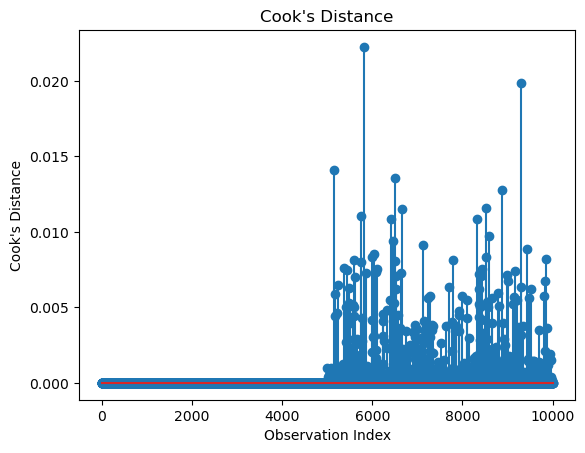

Indices of influential observations: [5812]
Age                                                     42
Gender                                                Male
ReAdmis                                                  1
Doc_visits                                               4
Initial_admin                          Emergency Admission
HighBlood                                                0
Stroke                                                   0
Complication_risk                                        1
Overweight                                               1
Arthritis                                                1
Diabetes                                                 0
Hyperlipidemia                                           1
BackPain                                                 0
Anxiety                                                  0
Asthma                                                   0
Initial_days                                      48.43358
Gender_Male 

In [87]:
# Cook's distance to check for outliers in reduced model
# Code adapted from Statology:
# Bobbit, Z. (2020). How to Calculate Cook’s Distance in Python
# Retrieved January 8, 2025, from https://www.statology.org/cooks-distance-python/


# Suppress scientific notation
import numpy as np
np.set_printoptions(suppress=True)

#create instance of influence
influence = reduced_model.get_influence()

#obtain Cook's distance for each observation
cooks = influence.cooks_distance

#display Cook's distances
print(cooks)


# Visualize cook's distance

plt.stem(np.arange(len(cooks[0])), cooks[0], markerfmt="o")
plt.title("Cook's Distance")
plt.xlabel("Observation Index")
plt.ylabel("Cook's Distance")
plt.show()

# Identify influential observations
influential_points = np.where(cooks[0] > 0.02)
print("Indices of influential observations:", influential_points[0])

# Inspect the influential observation 
print(df.iloc[5812])

In [89]:
# Odds ratio analysis

# Get coefficients and calculate odds ratios
coefficients = reduced_model.params
odds_ratios = np.exp(coefficients)

# Exclude intercept from analysis
odds_ratios = odds_ratios.drop('const', errors='ignore')

# Interpret each odds ratio
for predictor, or_value in odds_ratios.items():
    if or_value > 1:
        print(f"The odds ratio for {predictor} is {or_value:.2f}, meaning that as {predictor} increases by one unit, the odds of the outcome increase by {(or_value - 1) * 100:.2f}%.")
    elif or_value < 1:
        print(f"The odds ratio for {predictor} is {or_value:.2f}, meaning that as {predictor} increases by one unit, the odds of the outcome decrease by {(1 - or_value) * 100:.2f}%.")
    else:
        print(f"The odds ratio for {predictor} is {or_value:.2f}, meaning that {predictor} has no effect on the odds of the outcome.")


The odds ratio for Initial_admin_Emergency_Admission is 8.84, meaning that as Initial_admin_Emergency_Admission increases by one unit, the odds of the outcome increase by 784.05%.
The odds ratio for Initial_admin_Observation_Admission is 1.95, meaning that as Initial_admin_Observation_Admission increases by one unit, the odds of the outcome increase by 94.63%.
The odds ratio for HighBlood is 2.33, meaning that as HighBlood increases by one unit, the odds of the outcome increase by 133.42%.
The odds ratio for Stroke is 4.68, meaning that as Stroke increases by one unit, the odds of the outcome increase by 368.37%.
The odds ratio for Complication_risk is 2.16, meaning that as Complication_risk increases by one unit, the odds of the outcome increase by 115.82%.
The odds ratio for Arthritis is 0.29, meaning that as Arthritis increases by one unit, the odds of the outcome decrease by 70.91%.
The odds ratio for Diabetes is 1.58, meaning that as Diabetes increases by one unit, the odds of the

In [91]:
# Get regression equation

# Get coefficients from the reduced model
coefficients = reduced_model.params

# Build the log-odds regression equation
log_odds_equation = f"ln(p / (1-p)) = {coefficients['const']:.4f}"  # Start with intercept
for predictor, coef in coefficients.items():
    if predictor != 'const':  # Skip intercept after including it
        log_odds_equation += f" + ({coef:.4f})*{predictor}"

# Print the log-odds equation
print("Logistic Regression Equation:")
print(log_odds_equation)

Logistic Regression Equation:
ln(p / (1-p)) = -74.2729 + (2.1793)*Initial_admin_Emergency_Admission + (0.6659)*Initial_admin_Observation_Admission + (0.8477)*HighBlood + (1.5441)*Stroke + (0.7693)*Complication_risk + (-1.2347)*Arthritis + (0.4579)*Diabetes + (-1.2084)*Asthma + (1.3344)*Initial_days + (-0.8753)*Anxiety
